# TASK 4<br>SYNC INTERN MAY 2023<br>SIGN LANGUAGE DETECTION

In [1]:
# import libraries
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# load dataset
train_df=pd.read_csv(r"C:\Users\HP\Desktop\Data Science\sign_data\sign_mnist_train.csv")
test_df=pd.read_csv(r"C:\Users\HP\Desktop\Data Science\sign_data\sign_mnist_test.csv")

In [4]:
# check the dataset
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
# check the labels
train_label=train_df['label']
train_label.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [6]:
# drop labels
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [7]:
# reshape the trainset
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [8]:
# check and drop labels
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [10]:
# convert intger labels to binary
# import the dataset
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [11]:
# transform or fit to dset
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

In [12]:
print(y_train, y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [13]:
# reshape x_test 
X_test=X_test.values.reshape(-1,28,28,1)

In [14]:
#check their shapes
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


In [15]:
# augment the image dataset to generate new data
# using image data generator
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range = 0,height_shift_range=0.2,width_shift_range=0.2,
                shear_range=0,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

X_test = X_test/255

Text(0.5, 1.0, 'label: 13  letter: M')

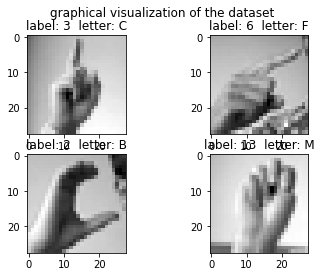

In [16]:
# preview the images in the training dataset
fig,axe=plt.subplots(2,2)
fig.suptitle('graphical visualization of the dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

In [18]:
# build the cnn model
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))    
model.add(Flatten())

In [19]:
# let's the dense and output layer
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [20]:
# check the compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
# fit the model to the set
model.fit(train_datagen.flow(X_train,y_train,batch_size=32),epochs = 10,validation_data=(X_test,y_test),shuffle=1)

Epoch 1/10
858/858 [==============================] - 103s 120ms/step - loss: 0.7724 - accuracy: 0.7368 - val_loss: 0.3963 - val_accuracy: 0.8583
Epoch 2/10
858/858 [==============================] - 104s 121ms/step - loss: 0.6241 - accuracy: 0.7885 - val_loss: 0.2374 - val_accuracy: 0.9229
Epoch 3/10
858/858 [==============================] - 104s 121ms/step - loss: 0.5147 - accuracy: 0.8241 - val_loss: 0.2927 - val_accuracy: 0.8911
Epoch 4/10
858/858 [==============================] - 104s 121ms/step - loss: 0.4454 - accuracy: 0.8483 - val_loss: 0.1676 - val_accuracy: 0.9515
Epoch 5/10
858/858 [==============================] - 103s 120ms/step - loss: 0.3951 - accuracy: 0.8638 - val_loss: 0.1342 - val_accuracy: 0.9591
Epoch 6/10
858/858 [==============================] - 103s 119ms/step - loss: 0.3521 - accuracy: 0.8799 - val_loss: 0.1650 - val_accuracy: 0.9384
Epoch 7/10
858/858 [==============================] - 103s 120ms/step - loss: 0.3303 - accuracy: 0.8885 - val_loss: 0.0531 -

In [25]:
# check the model performance
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 6s 25ms/step - loss: 0.0481 - accuracy: 0.9854


In [26]:
print('model accuracy = {}%'.format(acc*100))

model accuracy = 98.53597283363342%
